# Clean & Analyze Social Media

# Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Displaying the versions of the libraries
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("Seaborn version:", sns.__version__)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")


Pandas version: 1.0.3
NumPy version: 1.18.4
Matplotlib version: 3.2.1
Seaborn version: 0.10.1


In [16]:
# Define the list of categories
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

# Number of entries (n)
n = 500

# Generate random data
data = {
    'Date': pd.date_range('2021-01-01', periods=n),
    'Category': [random.choice(categories) for _ in range(n)],
    'Likes': np.random.randint(0, 10000, size=n)
}

# Load the data into a Pandas DataFrame and explore the data
tweets_df = pd.DataFrame(data)

print("DataFrame Head:")
print(tweets_df.head())

# Print DataFrame Information
print("\nDataFrame Info:")
print(tweets_df.info())

# Print DataFrame Description
print("\nDataFrame Description:")
print(tweets_df.describe())

# Print the count of each 'Category' element
print("\nCategory Count:")
print(tweets_df['Category'].value_counts())



DataFrame Head:
        Date Category  Likes
0 2021-01-01   Travel   4914
1 2021-01-02  Fitness   6037
2 2021-01-03  Fitness   2678
3 2021-01-04  Fashion   7985
4 2021-01-05   Health   9573

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB
None

DataFrame Description:
            Likes
count   500.00000
mean   4997.35800
std    2979.58906
min       1.00000
25%    2272.00000
50%    4997.00000
75%    7605.75000
max    9977.00000

Category Count:
Fitness    79
Health     69
Fashion    69
Food       59
Music      57
Travel     57
Family     56
Culture    54
Name: Category, dtype: int64


In [17]:
# Clean the data
# Removes empty cells
tweets_df.dropna(inplace=True)
tweets_df.drop_duplicates(inplace=True)

# Convert 'Date' to datetime format
tweets_df['Date'] = pd.to_datetime(tweets_df['Date'])

# Convert 'Number of likes' to integer
tweets_df['Likes'] = tweets_df['Likes'].astype(int)

print("\nCleaned DataFrame Info:")
print(tweets_df.info())

print("\nCleaned DataFrame Head:")
print(tweets_df.head())

print("\nCleaned DataFrame Description:")
print(tweets_df.describe())


Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 15.6+ KB
None

Cleaned DataFrame Head:
        Date Category  Likes
0 2021-01-01   Travel   4914
1 2021-01-02  Fitness   6037
2 2021-01-03  Fitness   2678
3 2021-01-04  Fashion   7985
4 2021-01-05   Health   9573

Cleaned DataFrame Description:
            Likes
count   500.00000
mean   4997.35800
std    2979.58906
min       1.00000
25%    2272.00000
50%    4997.00000
75%    7605.75000
max    9977.00000


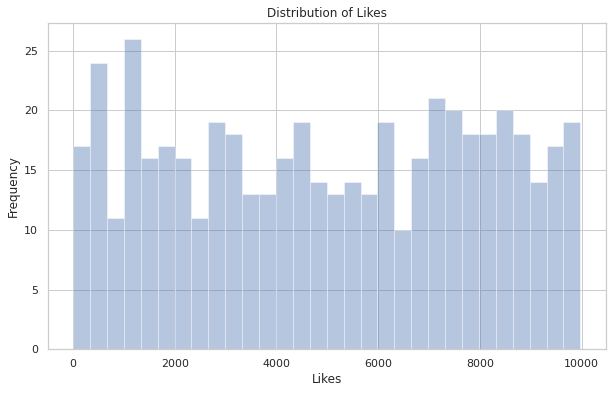

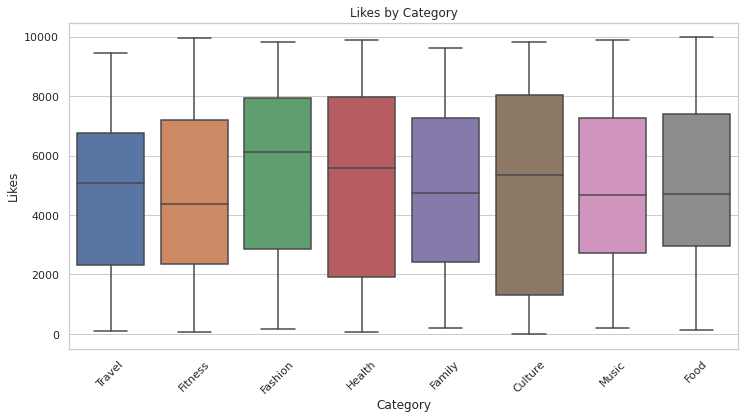

Overall Mean of Likes: 4997.358

Mean of Likes for each Category:
  Category   Mean_Likes
0  Culture  5083.925926
1   Family  4814.232143
2  Fashion  5531.057971
3  Fitness  4801.000000
4     Food  4974.423729
5   Health  5048.391304
6    Music  4886.982456
7   Travel  4793.684211

Category with the highest mean likes:
Category      Fashion
Mean_Likes    5531.06
Name: 2, dtype: object


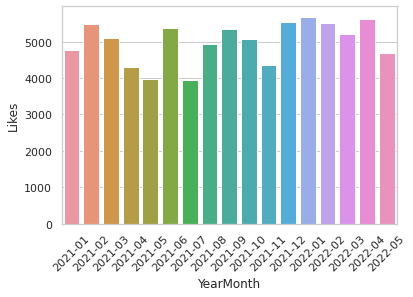


Month with the Most Likes: 2022-01


In [19]:
# Visualize and Analyze the data
# Histogram of Likes
plt.figure(figsize=(10, 6))

# Returns distplot
sns.distplot(tweets_df['Likes'], bins=30, kde=False)
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Likes by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Likes', data=tweets_df)
plt.title('Likes by Category')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.show()

# Perform statistics on the data
# Mean of Likes overall
overall_mean_likes = tweets_df['Likes'].mean()
print("Overall Mean of Likes:", overall_mean_likes)

# Mean of Likes for each Category
category_mean_likes = tweets_df.groupby('Category')['Likes'].mean().reset_index()
category_mean_likes.columns = ['Category', 'Mean_Likes']

print("\nMean of Likes for each Category:")
print(category_mean_likes)

# Category with the highest mean likes
max_mean_category = category_mean_likes.loc[category_mean_likes['Mean_Likes'].idxmax()]
print("\nCategory with the highest mean likes:")
print(max_mean_category)

# Calculate the month with more likes
tweets_df['YearMonth'] = tweets_df['Date'].dt.to_period('M')
monthly_likes = tweets_df.groupby('YearMonth')['Likes'].mean().reset_index()
sns.barplot(data=monthly_likes, x='YearMonth', y='Likes')

plt.xticks(rotation=45)
plt.show()

# Find and print the month with the most likes
month_with_max_likes = monthly_likes.loc[monthly_likes['Likes'].idxmax(), 'YearMonth']
print("\nMonth with the Most Likes:", month_with_max_likes)

In [20]:
conclusions = f"""
Conclusions:
- The most liked category is Fashion, with an average of 5531 likes. Therefore, posts should be more fashion related to achieve better engagement. 
- The least liked category is Travel, with an average of 4793 likes. Therefore, travel related posts need more invesment to become more appealing. 
- The month in which most likes were achieved was January, while the months with the least number of likes were May and July.
"""
print(conclusions)


Conclusions:
- The most liked category is Fashion, with an average of 5531 likes. Therefore, posts should be more fashion related to achieve better engagement. 
- The least liked category is Travel, with an average of 4793 likes. Therefore, travel related posts need more invesment to become more appealing. 
- The month in which most likes were achieved was January, while the months with the least number of likes were May and July.

